# __Why are the best employees leaving?__

 *__Exploratory Data Analysis using R__*

### Description on Kaggle

*This dataset is simulated

Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:

- Satisfaction Level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Departments (column sales)
- Salary
- Whether the employee has left

### Table of contents
- Introduction
- Overviewing and Organizing Variables
- Univariate Analysis
- Bivariate and Multivariate Analysis
- Analysis for Best employees
- Summary with Final Plots

### __Introduction__

Here I explore the HR data with visualizations by ggplot in R. First, I used all employee data to find out characteristics of employees who left the company. Then I focused my analysis on the best employees with high evaluation to see what can make them leave the company. 

After I explore and visualize data, who will leave the company is predicted using machine learning by Python (check out the machine learning part in the same repository). There I predicted who left the company with 98% accuracy, 95% precision, 97% recall, 96% f1 and 97% f2.

Plots in the earlier sections were created to explore data following my thought process, so they are not the best plots. However, the final plots in the last section are the most interesting graphs selected from the previous sections and generated more carefully. Thus, you can jump to the last summary section and come back to the previous sections if necessary.

### __Overviewing and Organizing Variables__

In [1]:
# Input data files are available in the "../input/" directory.
list.files("../input")

[1] "HR_comma_sep.csv"

In [2]:
# Load all of the packages to be used
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(gridExtra)
library(GGally)
library(RColorBrewer)
suppressMessages(library(dplyr))
library(grid)

In [3]:
# Load the Data
Data_origin = read.csv('../input/HR_comma_sep.csv', header = TRUE) 

In [4]:
dim(Data_origin) # Check data dimension

[1] 14999    10

This data set has information from 14999 employees each with 10 features. 

In [5]:
# Check the 10 features (variables)
str(Data_origin) # or colnames(Data_origin) and head(Data_origin) are helpful
summary(Data_origin)

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int  157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int  0 0 0 0 0 0 0 0 0 0 ...
 $ sales                : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary               : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...


 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
                                                                         
 time_spend_company Work_accident         left        promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:



The ten features and their descriptions are as followings:

- 'satisfaction_level' (level of satisfaction, 0-1)
- 'last_evaluation' (performance score evaluated by the company, 0-1)
- 'number_project' (number of projects completed)
- 'average_montly_hours' (average_monthly_hours at workplace)
- 'time_spend_company' (number of years spent in the company) 
- 'Work_accident' (whether the employee had a workplace accident, 0 or 1)
- 'left' (whether the employee left the workplace, 0 or 1)
- 'promotion_last_5years' (whether the employee was promoted in the last 5 years)
- 'sales' (department in which they work for)
- 'salary' (relative level of salary, low, medium or high)

The summary statistics show 'sales' and 'salary' are only categorical variables and all other variables are numerical. The summary also shows there are no missing values in this dataset. It also shows 

-  The proportion of employees who had a work accidents is  14.46%
-  The proportion of employees who left the workplace is 23.81%
-  The proportion of employees who was promoted in the last 5 years is 2.13%.

Since there is a typo in the column name 'average_montly_hours' and the column name  'sales' is not representing its meaning, I will make a new data frame with modified column names. I will also arrange the factor levels of salary in the right order and make some new categorical variables from the variables only with 0 or 1 for values. 

In [6]:
# rename variables
Data = Data_origin
colnames(Data)[4] ="average_hours" # modified from'average_montly_hours' 
colnames(Data)[5] ="years_in_company" # modified from 'time_spend_company'
colnames(Data)[9] ="department" # modified from sales
colnames(Data)[6] ="work_accident" # made W to w
# check new variable names
colnames(Data)

[1] "satisfaction_level"    "last_evaluation"       "number_project"       
 [4] "average_hours"         "years_in_company"      "work_accident"        
 [7] "left"                  "promotion_last_5years" "department"           
[10] "salary"

In [7]:
# arrange the factor levels of salary
Data$salary = factor(Data$salary, levels =c('low','medium','high'))
levels(Data$salary)

[1] "low"    "medium" "high"

In [8]:
# making a new categorical variable for 'work_accident'
Data$work_accident.Factor <- factor(Data$work_accident)

In [9]:
# making a new categorical variable for 'left'
Data$left.Factor <- factor(ifelse(Data$left == 0, c("Not_Left"), c("Left")), 
                           levels = c("Not_Left", "Left")) 

In [10]:
# making a new categorical variable for 'promotion_last_5years'
Data$promotion_last_5years.Factor <- factor(ifelse(Data$promotion_last_5years==0, 
                                                   c("Not_Promoted"),c("Promoted")),
                                            levels = c("Not_Promoted", "Promoted"))

### __Univariate  Analysis__

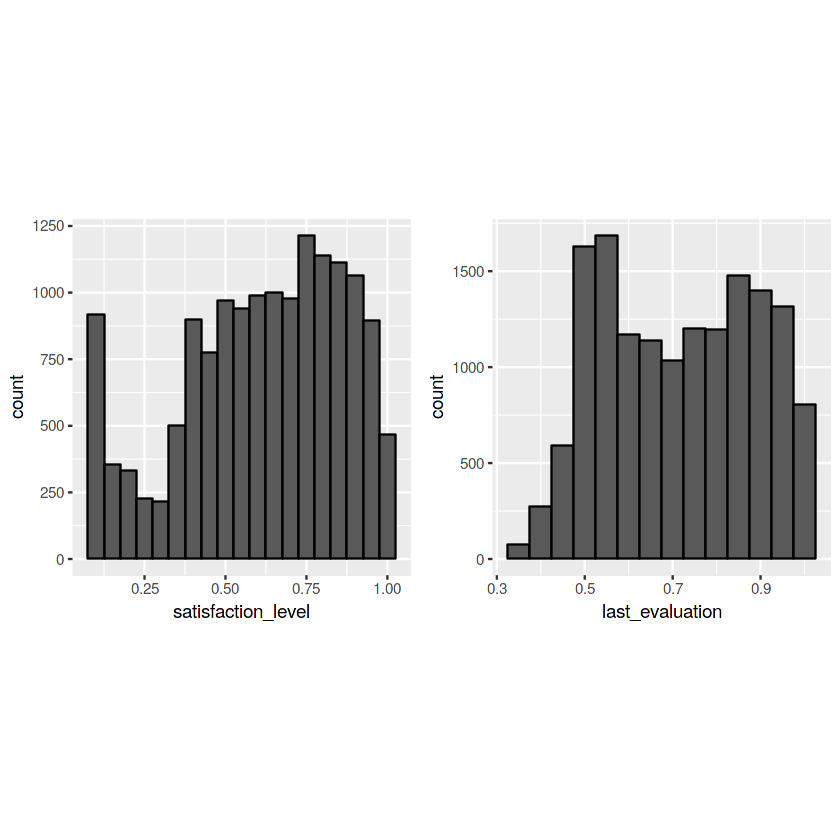

In [11]:
### variables with numbers between 0 and 1 
# satisfaction_level
p1 = qplot(data = Data, x=satisfaction_level, color = I('black'), binwidth =.05)
# last_evaluation
p2 = qplot(data = Data, x=last_evaluation, color = I('black'), binwidth =.05)

# library(gridExtra)
grid.arrange(p1,p2, ncol=2, heights = unit(0.5,"npc"))

- Both 'satisfaction_level'  and 'last_evaluation' seem to be bimodal (having two modes).  
- The satisfaction level  has a smaller peak around 0.1 and a bigger peak around 0.75.
- The last evaluation has peaks around 0.55 and  0.85
- I  wonder why there are those two peaks for each variable.

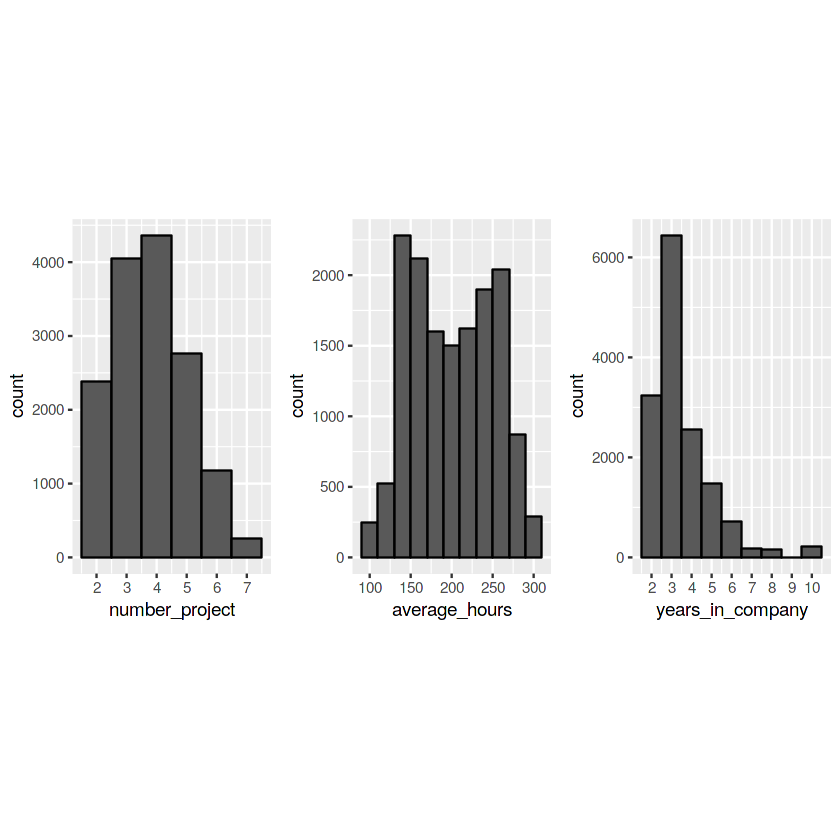

In [12]:
### variables with integers
# number_project
p3 = qplot(data = Data, x=number_project, color = I('black'), binwidth =1) + 
  scale_x_continuous(breaks = 1:7)
# average_hours
p4 = qplot(data = Data, x=average_hours, color = I('black'), binwidth =20)
# years_in_company
p5 = qplot(data = Data, x=years_in_company, color = I('black'), binwidth =1) +
  scale_x_continuous(breaks = 1:10)

grid.arrange(p3,p4,p5, ncol=3,heights = unit(0.5,"npc")) 

- The number of projects and number of years spent in the company are both right-skewed. 
- The average monthly hours at workplace has two modes, one around 140 and the other around 260.  I will investigate what can make these two peaks.

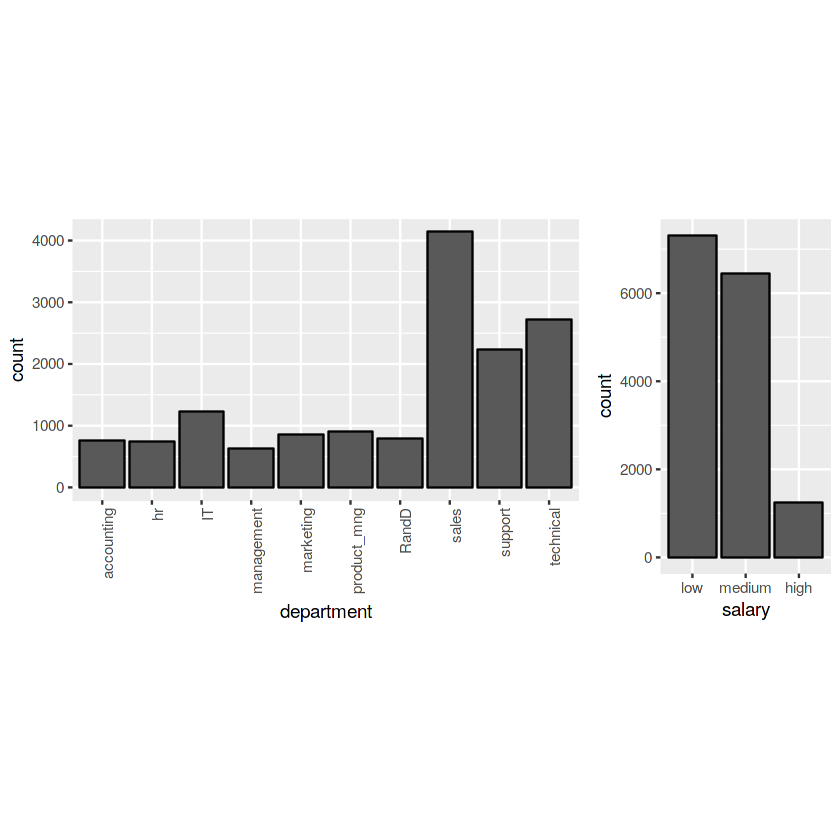

In [13]:
### categorical variables
# department
p6 = qplot(data = Data, x=department, color = I('black')) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) # vertical x-axis label
# salary
p7 = qplot(data = Data, x=salary, color = I('black'))

# library(gridExtra)
grid.arrange(p6,p7, ncol=2, heights = unit(0.5,"npc"), widths = c(.7,.3)) 

- The most frequent department is 'sales' and 'technical' and 'support' are the next frequent departments in which the employees work for.
- The most frequent salary level is 'low'. The 'high' salary level was much less frequent than the other two levels.

### __Bivariate  and Multivariate Analysis__

*__Overview__* 

Warning message in ggcorr(Data, label = TRUE, hjust = 0.7, label_round = 2, label_size = 5, :
“data in column(s) 'department', 'salary', 'work_accident.Factor', 'left.Factor', 'promotion_last_5years.Factor' are not numeric and were ignored”

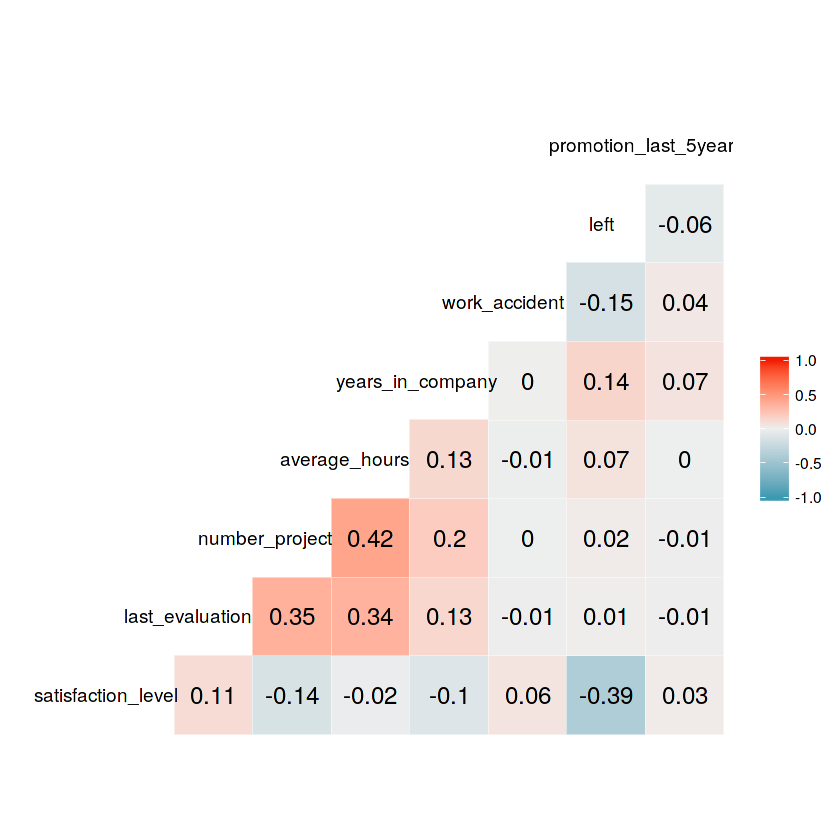

In [14]:
#library(GGally)
ggcorr(Data, 
       label = TRUE,  # corr. coefficients
       hjust = 0.7,   # change variable name positions
       label_round = 2, # corr. digits
       label_size = 5,  # corr. letter size
       layout.exp = 1) # help displaying variables with long names

- This correlation table shows the last evaluation, number of projects and average monthly hours at workplace are moderately correlated to each other (0.34 ~ 0.42)
- The satisfaction level and whether employees are left the workplace or not are negatively correlated (-0.39)

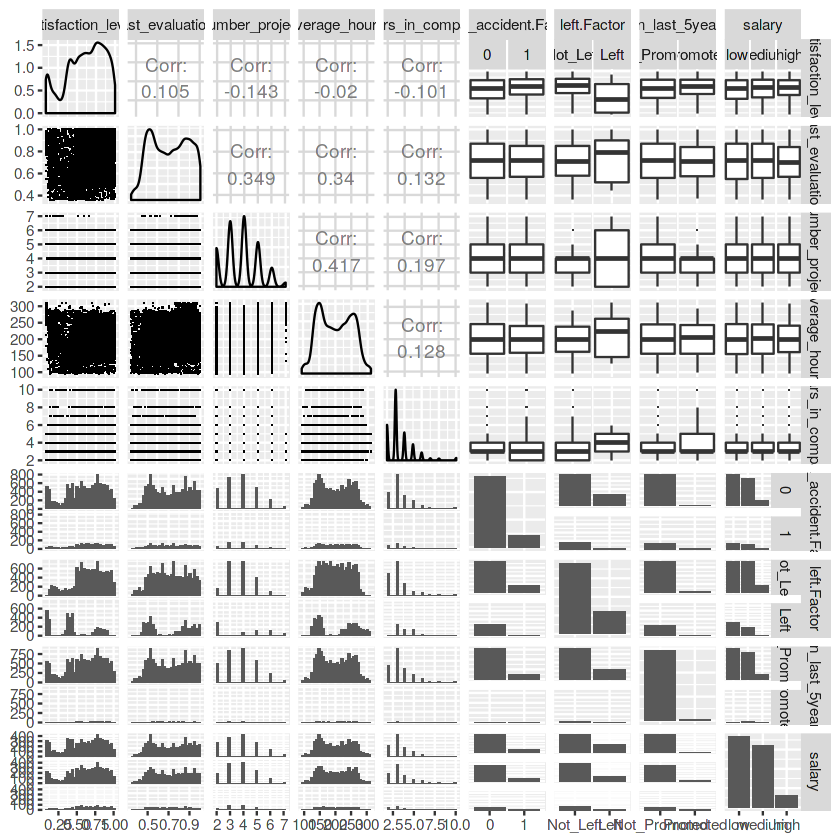

In [15]:
# Overall plots of subset data
p = ggpairs(subset(Data, select = c(satisfaction_level,
                                last_evaluation,
                                number_project,
                                average_hours,
                                years_in_company,
                                work_accident.Factor,
                                left.Factor,
                                promotion_last_5years.Factor,
                                #department,
                                salary)),
      lower = list(continuous = wrap("points", shape = I('.'))), 
      upper = list(combo = wrap("box", outlier.shape = I('.'))))
suppressMessages(print(p))

- The overall plots show numerical variables (satisfaction levels, last evaluation,'number of projects, average workplace hours and years in company) are not significantly varied by whether there was a work accident, whether promoted in the last 5 years, or salary. 
- However,  the distributions look different for employees who  left the company  and who have not (see the 7th column).  The differences do not look significant at glance, but I will look into these differences later.

*__Who left the company?__* 

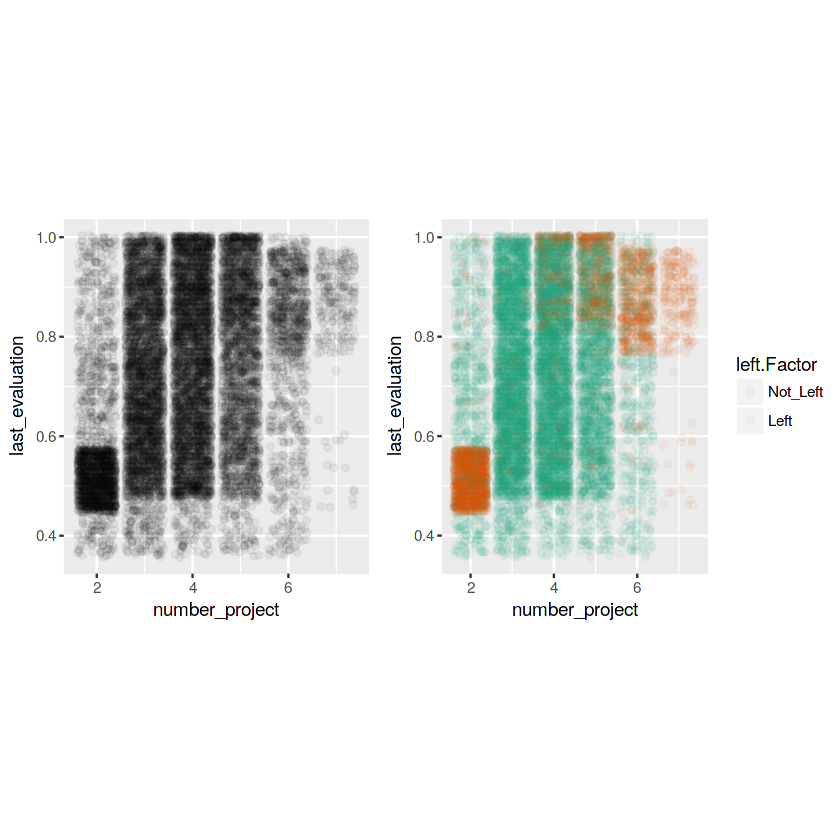

In [16]:
# last evaluation vs. number of projects & left or not
p1 = ggplot(aes(x = number_project, y = last_evaluation), data = Data) +
  geom_jitter(alpha=1/20) 
p2 = ggplot(aes(x = number_project, y = last_evaluation), data = Data) +
  geom_jitter(alpha=1/20, aes(color=left.Factor) ) +
  scale_colour_brewer(palette = "Dark2")
grid.arrange(p1,p2, ncol=2, heights = unit(0.5, "npc"), widths = c(.45,.55))

- The left graph shows the moderate correlation between the number of projects and the last evaluation score.  In other words, employees who completed more projects are more likely to get higher evaluation scores.
- The small darker block of points for number_project =2 with low evaluation scores (on the bottom left corner of the left graph) makes me wonder who they are. Thus, I colored points with the variable representing whether employees left the workplace or not (right graph). The darker block turned out to be those who left the company. They are possibly laid off due to low evaluation scores or a small number of completed projects).
- The orange points on the top right corner show people who received high evaluation scores and completed many projects also left the workplace. This is possibly because they spent many years in the company. 

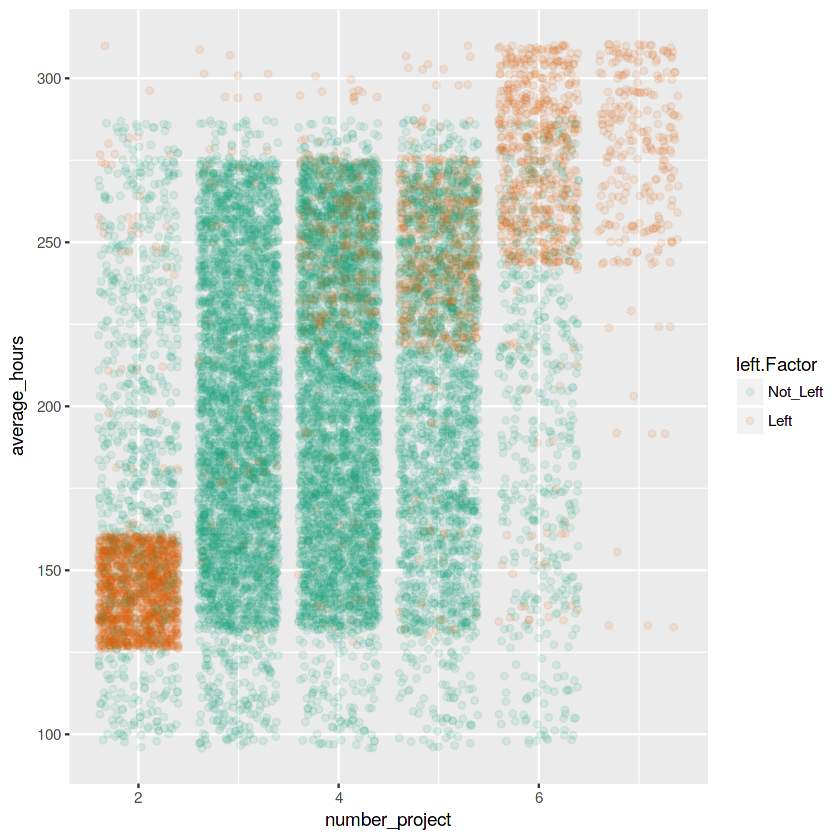

In [17]:
# number of projects vs. average monthly hours & left or not
ggplot(aes(x = number_project, y = average_hours), data = Data) +
  geom_jitter(alpha=1/10, aes(color=left.Factor) )+
  scale_colour_brewer(palette = "Dark2")


This graph shows a very similar pattern to the one in the previous graph.  Is this because average hours spent at the workplace  are correlated to evaluation scores? The next graph shows their relation.

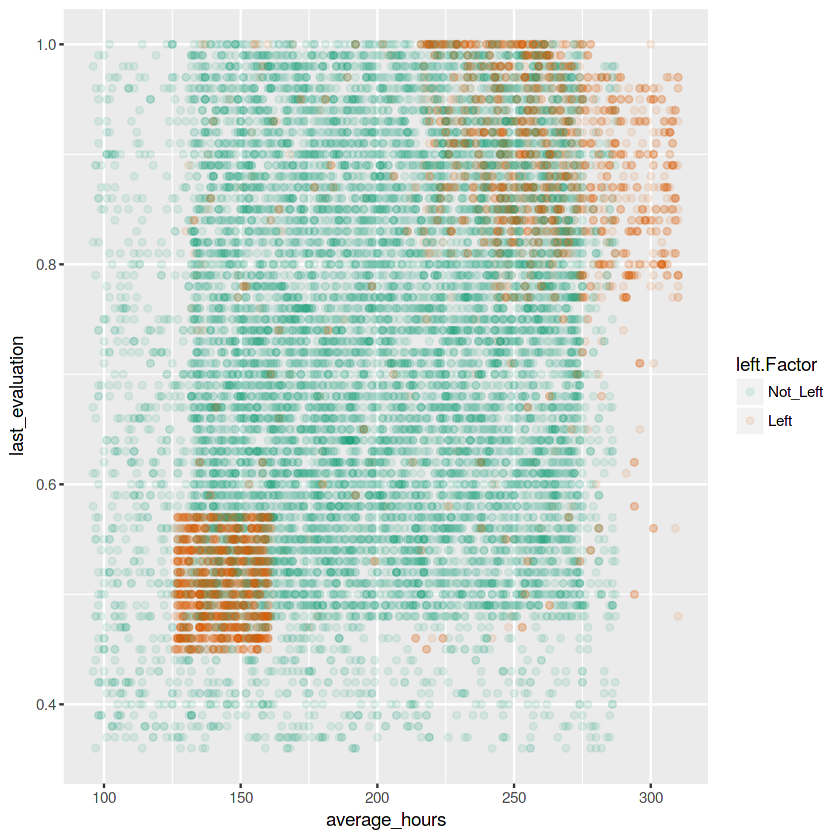

In [18]:
# last evaluation vs. average monthly hours & left or not
ggplot(aes(x = average_hours, y = last_evaluation), data = Data) +
  geom_point(alpha =1/10, aes(color=left.Factor) ) +
  scale_colour_brewer(palette = "Dark2")

- This shows the moderate correlation between average monthly hours and  evaluation scores.  Instead of staying on a linear line, the points are scatted symmetrically around a linear line. 
- As expected, the orange points representing who left the company are still on the top right and bottom left corners.
- The two peaks for each of last_evaluation and average_hours found in the univariate  analysis seem to be made by those who left the company on the bottom left and top right corners.

It is not difficult to understand why those employees with low evaluation on the bottom left corner left the company, but what about the employees on the top right corner who received high evaluation scores? I will check their other features including satisfaction levels. 

*__Who are those employees who received high evaluation, but left?__*

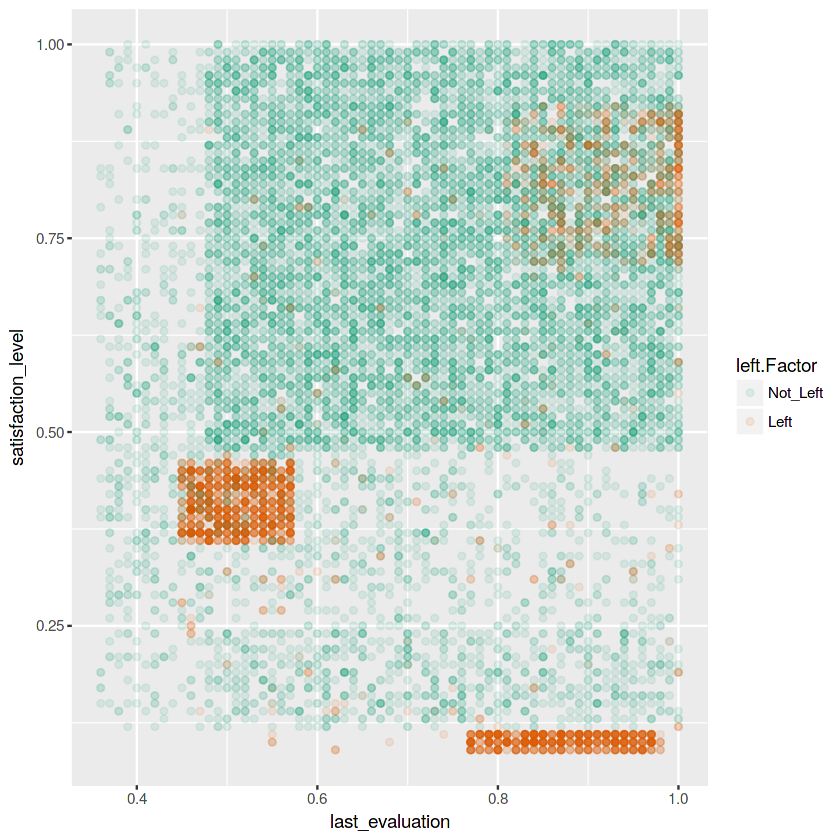

In [19]:
# satisfaction_level vs. last_evaluation & left or not
ggplot(aes(x = last_evaluation, y = satisfaction_level), data = Data) +
  geom_point(alpha=1/10, aes(color=left.Factor))+
  scale_colour_brewer(palette = "Dark2")

- The two peaks for satisfaction_level found in the univariate  analysis seem to be made by those who left the company with high evaluation scores on the bottom and top right corners.
- This scatter plot for last evaluation vs. satisfaction level shows a similar pattern to one we have seen in the previous plot, but there is a difference. 
- Those who received high evaluation scores and left the workplace had relatively low satisfaction levels. They are a little below the top right corner and  some of them are even on the bottom right corner meaning the employees had lowest satisfaction levels despite of their high evaluation scores. Then, who are they?

To find out who are those employees, I will now color the above plot with the number of projects,  average monthly hours, and the number of years spent in the company.

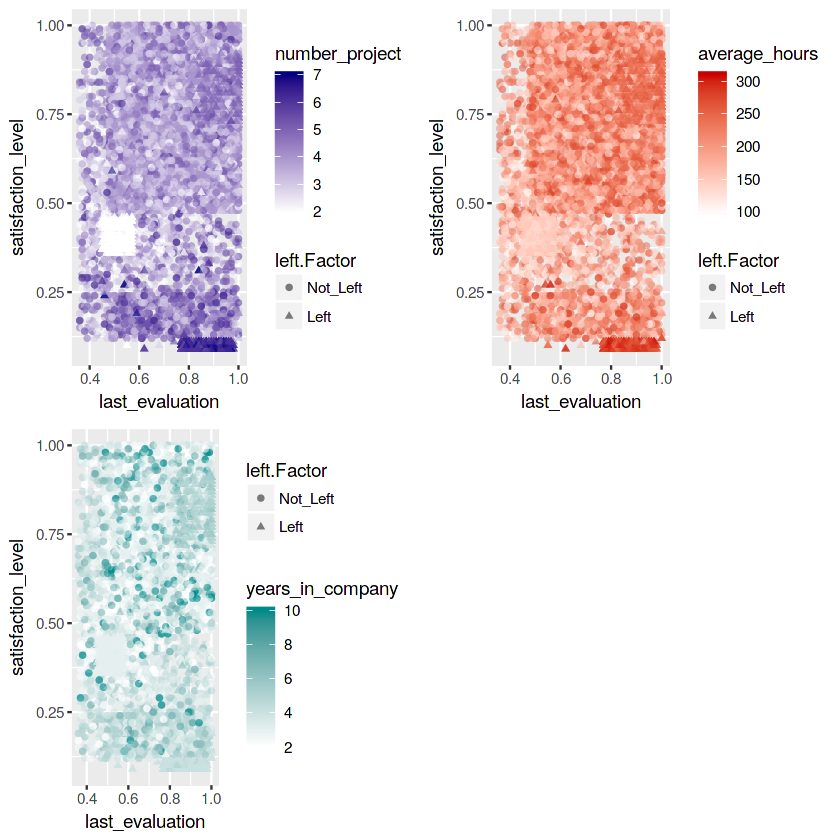

In [20]:
# satisfaction_level vs. last_evaluation & number of projects
p1 = ggplot(aes(x = last_evaluation, y = satisfaction_level), data = Data) +
  geom_point(alpha=1/2, aes(color=number_project, shape = left.Factor)) +
  scale_colour_gradient(low = "white", high = "navyblue") 
# satisfaction_level vs. last_evaluation & average monthly hours
p2 = ggplot(aes(x = last_evaluation, y = satisfaction_level), data = Data) +
  geom_point(alpha=1/2, aes(color=average_hours, shape = left.Factor)) +
  scale_colour_gradient(low = "white", high = "red3") 
# satisfaction_level vs. last_evaluation & time spent in the company
p3 = ggplot(aes(x = last_evaluation, y = satisfaction_level), data = Data) +
  geom_point(alpha=1/2, aes(color=years_in_company, shape = left.Factor)) +
  scale_colour_gradient(low = "white", high = "darkcyan") 

grid.arrange(p1,p2,p3, ncol =2)

- The first two plots show that those employees with good evaluation scores and low satisfaction levels, not in the company anymore are people who completed more projects and  spent more hours at the workplace. 
- However, the last plot shows that they are not those who spent more years in the company.

Now I will focus on those employees who had high evaluations scores.  I will make a subset data with employees whose evaluation scores were higher than .75 and call them  *best employees*. 

### __Analysis for Best Employees__

In [21]:
# Make subset data with high evaluation
Data_high_eval = subset(Data, last_evaluation > .75)

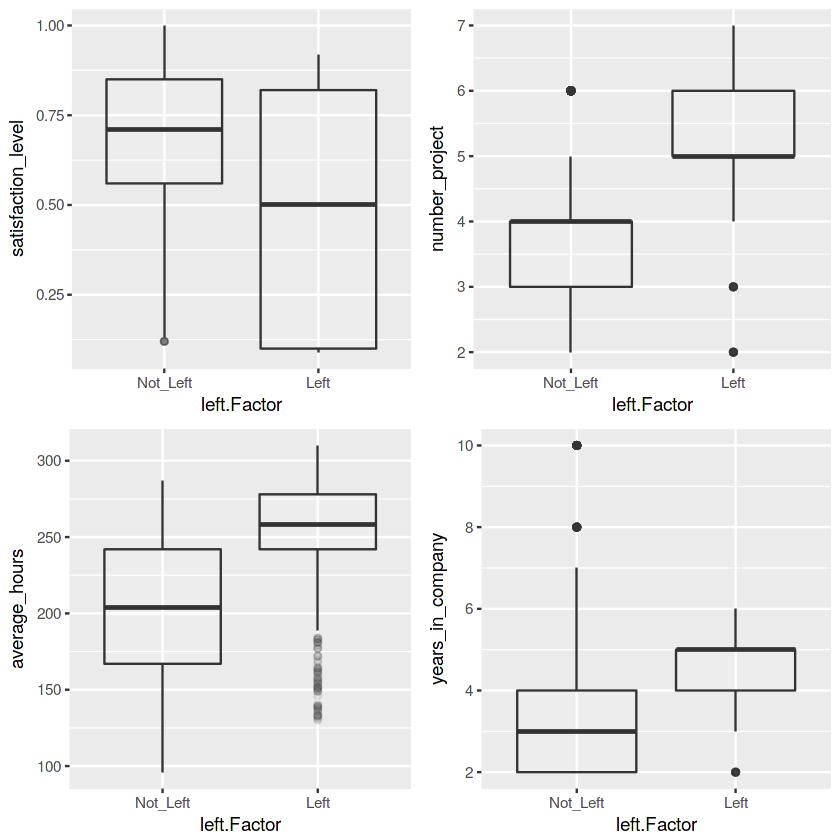

In [22]:
p1 = ggplot(aes(x = left.Factor, y = satisfaction_level), data = Data_high_eval) +
  geom_boxplot(alpha = .1)  
p2 = ggplot(aes(x = left.Factor, y = number_project), data = Data_high_eval) +
  geom_boxplot(alpha = .1)
p3 = ggplot(aes(x = left.Factor, y = average_hours), data = Data_high_eval) +
  geom_boxplot(alpha = .1)
p4 = ggplot(aes(x = left.Factor, y = years_in_company), data = Data_high_eval) +
  geom_boxplot(alpha = .1)

grid.arrange(p1, p2,p3,p4, ncol=2)

- The ggpair plots drawn much earlier for the overall data visualization showed there is no significant difference on these variables between employees who left and who haven't. 
- However, these current plots for employees with high evaluation scores showed much bigger differences between employees who left and who have not.  
- It is suggested that the best employees who left the workplace had lower satisfaction level, completed many more projects, spent more hours at workplace, and had worked for more years in the company than the best employees who have not left.

Now I will investigate whether a promotion or a work  accident have an influence on their leaving. 

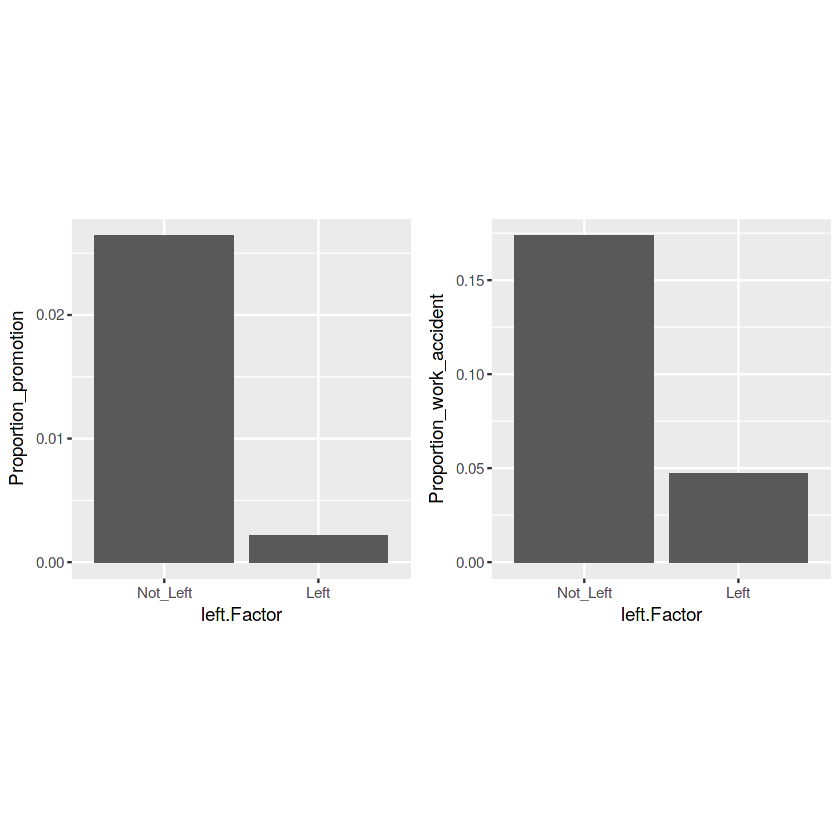

In [23]:
# Calculate the proportion of promoted employess grouped by left
Data_by_left <- group_by(Data_high_eval, left.Factor)

Data_meanPromotion_by_left <- 
  summarise(Data_by_left,
            Proportion_promotion = mean(promotion_last_5years),
            Proportion_work_accident = mean(work_accident))

p1 = ggplot(Data_meanPromotion_by_left, 
       aes(x=left.Factor, y =Proportion_promotion)) + 
  geom_bar(stat="identity")
p2 = ggplot(Data_meanPromotion_by_left, 
       aes(x=left.Factor, y =Proportion_work_accident)) + 
  geom_bar(stat="identity")
grid.arrange(p1,p2, ncol=2, heights = unit(.5,"npc"))

- The left plot shows people who left got much less promotions in the last 5 years than people who have not left.  It suggests people who promoted in recent years are more likely to stay in the company.
-  The right plot shows employees who have not left had more workplace accidents than people who left. I do not know what kinds of work accidents they were, but it seems people who had accidents are more likely to stay in the workplace.

So far, I have found that whether an employee left or not was influenced by the number of completed projects, workplace hours, the number of years in the company, and whether promoted or not.  Lastly, I will investigate those patterns I found are differed by the level of salary.

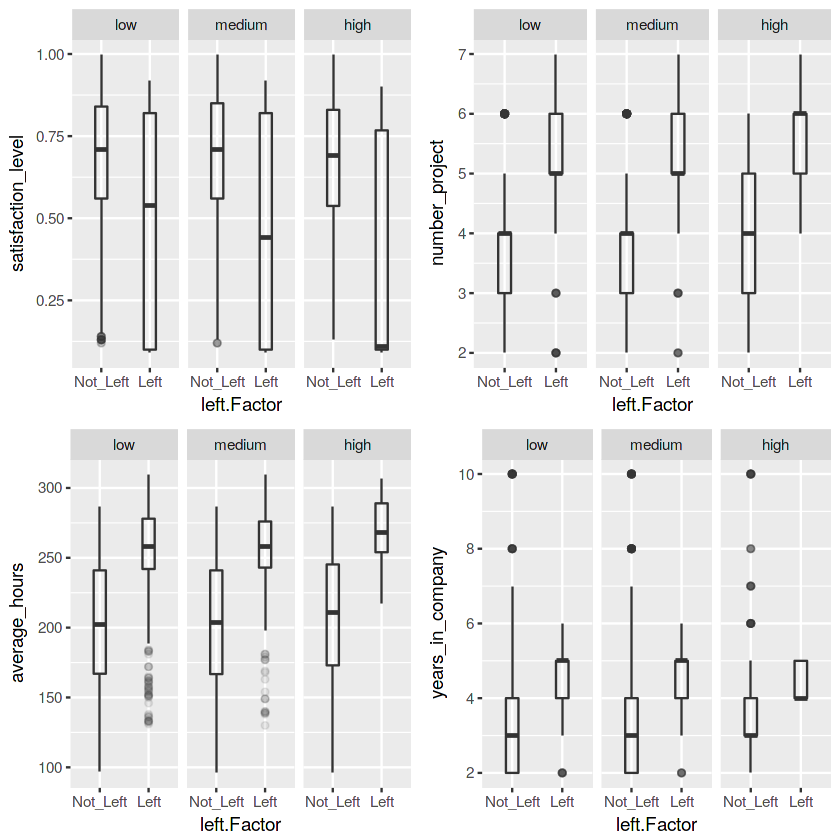

In [24]:
# Number of completed projects
p0 = ggplot(aes(x = left.Factor, y = satisfaction_level), data = Data_high_eval) +
  geom_boxplot(alpha = .1) + facet_wrap(~salary)
p1 = ggplot(aes(x = left.Factor, y = number_project), data = Data_high_eval) +
  geom_boxplot(alpha = .1) + facet_wrap(~salary) 
# Average workplace hours
p2 = ggplot(aes(x = left.Factor, y = average_hours), data = Data_high_eval) +
  geom_boxplot(alpha = .1) + facet_wrap(~salary) 
# Number of years in company
p3 = ggplot(aes(x = left.Factor, y = years_in_company), data = Data_high_eval) +
  geom_boxplot(alpha = .1) + facet_wrap(~salary) 

grid.arrange(p0, p1,p2,p3)

The patterns I found so far for best employees are still there even if data were divided by the level of salary. There seems to be no significant difference on those patterns between different salary groups except for the first plot. The difference on the median satisfaction levels between the left and not left groups gets bigger as salary level increases. However, satisfaction levels for the left and not left groups overlap a lot, so the difference is not significant.

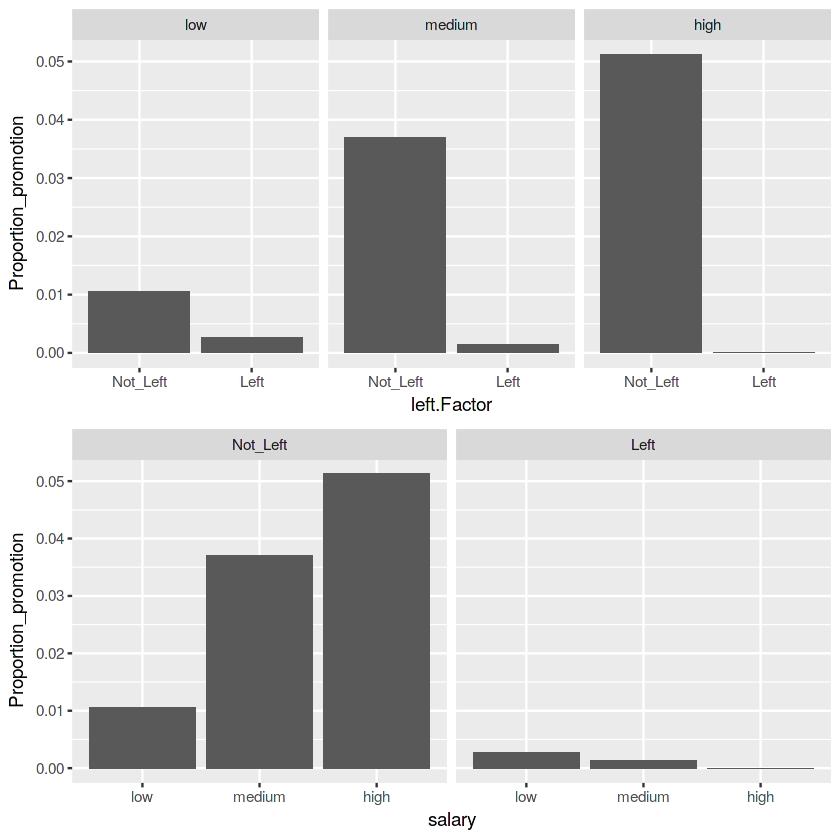

In [25]:
# Calculate the proportion of promoted employess grouped by left and salary
Data_meanPromotion_by_salary_left <- Data_high_eval %>%  
                             group_by(salary, left.Factor) %>%
                             summarise(Proportion_promotion = mean(promotion_last_5years))
# Promoted or not facet wrap by salary
p1 = ggplot(Data_meanPromotion_by_salary_left, aes(x=left.Factor, y =Proportion_promotion)) +
  geom_bar(stat="identity") + facet_wrap(~salary) 
# Promoted or not facet wrap by left
p2 = ggplot(Data_meanPromotion_by_salary_left, aes(x=salary, y =Proportion_promotion)) +
  geom_bar(stat="identity") + facet_wrap(~left.Factor) 
grid.arrange(p1,p2)

Interesting graphs! 

- Each graph in the top line shows that the pattern we have seen is still there even if employees are divided into different levels of salary.  i.e., The proportion of promoted employees is much higher for the not left group than for the left group.
- The more interesting and new pattern existing in the first line of graphs is that the proportion difference between left  and not left groups gets more severe as the level of salary increases. If salary level of an employee is higher, the promotion seems to have a much bigger impact on whether the employee left or not.
- To see this pattern in a different way the graphs were redrawn using salary level as x a and left or facet wrap by left or not (see the graphs in the bottom line).  The more proportions of people were promoted if they are in the higher salary level, generally and especially for those who have not left the company.  However,  for those who left the company, the proportion of promoted people was less for higher salary levels. 

The above graphs made me want to visualize how proportions of employees who left change by salary level and promotion. 

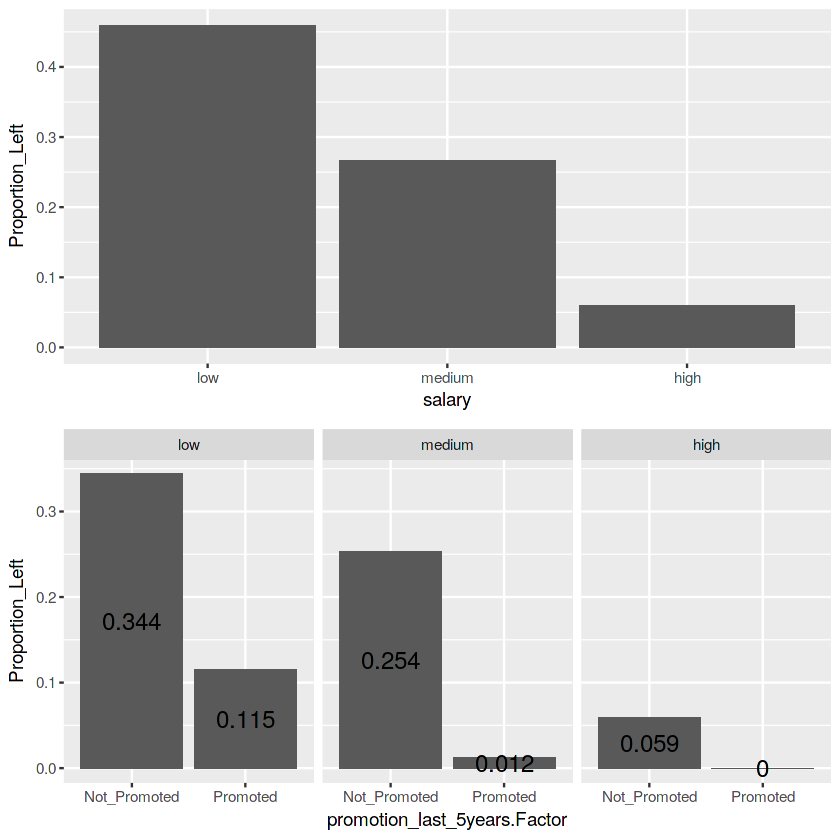

In [26]:
# Calculate the proportion of employees who left grouped by promoted and salary
Data_meanLeft_by_salary_left <- Data_high_eval %>%  
                             group_by(salary, promotion_last_5years.Factor) %>%
                             summarise(Proportion_Left = mean(left))
# Promoted or not facet wrap by salary
p1 =  ggplot(Data_meanLeft_by_salary_left, aes(x=salary, y =Proportion_Left)) +
  geom_bar(stat="identity") 
p2 = ggplot(Data_meanLeft_by_salary_left, aes(x=promotion_last_5years.Factor, y =Proportion_Left,
                                             label = round(Proportion_Left,3))) +
  geom_bar(stat="identity")  + facet_wrap(~salary)  +
  geom_text(size = 5, position = position_stack(vjust = 0.5))
grid.arrange(p1,p2)

- As expected, the proportion of employees who left decreased as salary level increases. In other words, people are more likely to stay if they are paid more (first graph).  
- Promoted employees are less likely to leave the workplace. This was expected from the earlier graph for the proportion of promoted employees for left and not left groups.  
- More specifically, the second row of graphs show the difference on the proportion of employees who left between promoted and not promoted groups is more severe for the higher salary group. For example,  for the low salary group, the proportion of employees who left for the not promoted group is around 3 times higher than that for the promoted group (i.e.,  .344 vs. .115). For the medium salary group, it is around 20 times higher and for the high salary group, it is infinity times since no one left the company in the promoted group.

### __Summary with Final Plots__ 

**Employees who left the company**

*Scatter plots* 

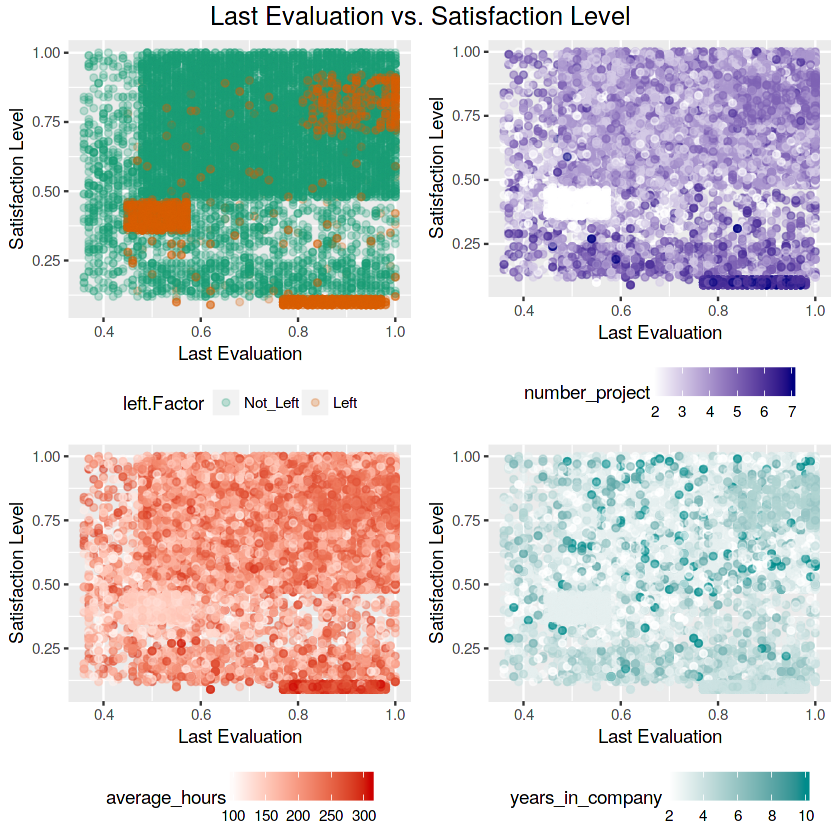

In [27]:
# satisfaction_level vs. last_evaluation & left or not
p4 = ggplot(aes(x = last_evaluation, y = satisfaction_level), data = Data) +
  geom_point(alpha=1/4, aes(color=left.Factor))+
  scale_colour_brewer(palette = "Dark2") +
  xlab('Last Evaluation') + ylab('Satisfaction Level') + 
  theme(legend.position="bottom") # + ggtitle('')
# satisfaction_level vs. last_evaluation & number of projects
p1 = ggplot(aes(x = last_evaluation, y = satisfaction_level), data = Data) +
  geom_point(alpha=1/2, aes(color=number_project)) +
  scale_colour_gradient(low = "white", high = "navyblue")  +
  xlab('Last Evaluation') + ylab('Satisfaction Level') +
  theme(legend.position="bottom") # + ggtitle('')
# satisfaction_level vs. last_evaluation & average monthly hours
p2 = ggplot(aes(x = last_evaluation, y = satisfaction_level), data = Data) +
  geom_point(alpha=1/2, aes(color=average_hours)) +
  scale_colour_gradient(low = "white", high = "red3") +
  xlab('Last Evaluation') + ylab('Satisfaction Level') + 
  theme(legend.position="bottom") # + ggtitle('')
# satisfaction_level vs. last_evaluation & time spent in the company
p3 = ggplot(aes(x = last_evaluation, y = satisfaction_level), data = Data) +
  geom_point(alpha=1/2, aes(color=years_in_company)) +
  scale_colour_gradient(low = "white", high = "darkcyan") +
  xlab('Last Evaluation') + ylab('Satisfaction Level') + 
  theme(legend.position="bottom") # + ggtitle('')

grid.arrange(p4, p1,p2,p3, ncol =2, 
             top=textGrob("Last Evaluation vs. Satisfaction Level", 
                          gp=gpar(fontsize=15,font=8))) # library(grid) needed

- There were two groups of employees who left the company, who received good last evaluation and who received bad evaluation. The group who received good evaluation and left can be also divided into two groups, who had high satisfaction levels and and who had very low satisfaction levels (see the orange points on the bottom right corner of the top left plot).
- The top right and bottom left plots show some features of the group of employees who left with good evaluation and low satisfaction levels. They completed many more projects and  spent more hours at the workplace than others. The bottom right plot shows that they are not necessarily those who spent more years in the company.

**Features of Employees who received good evaluation and left**

*Box plots* 

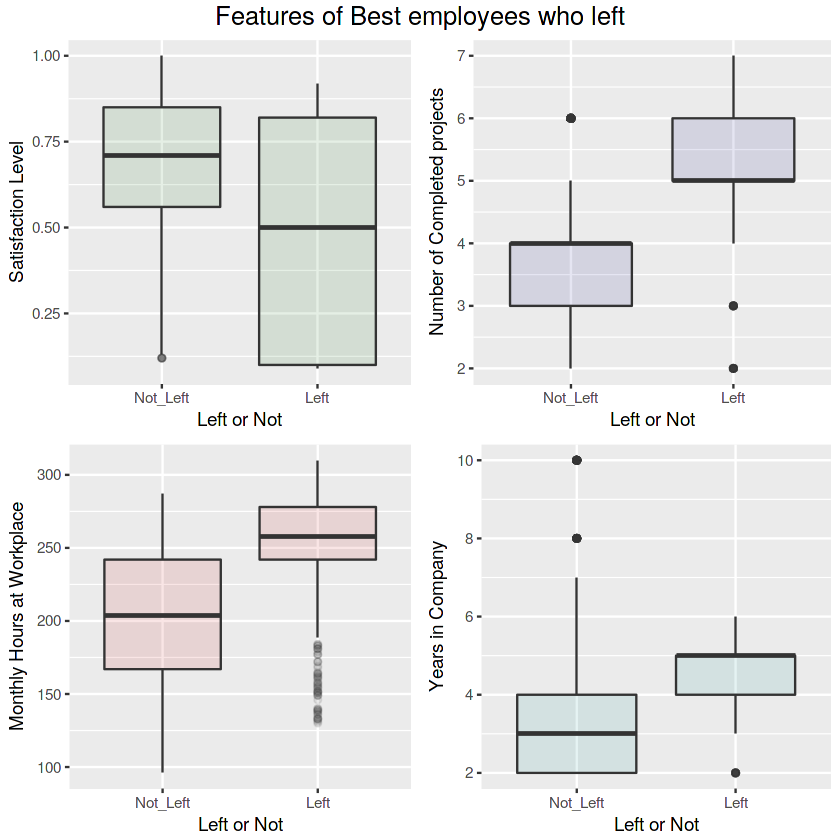

In [28]:
# Make subset data with high evaluation
Data_high_eval = subset(Data, last_evaluation > .75)

p1 = ggplot(aes(x = left.Factor, y = satisfaction_level), data = Data_high_eval) +
  geom_boxplot(alpha = .1, fill = 'darkgreen')  + 
  xlab('Left or Not') + ylab('Satisfaction Level') 
p2 = ggplot(aes(x = left.Factor, y = number_project), data = Data_high_eval) +
  geom_boxplot(alpha = .1, fill = 'navyblue') + 
  xlab('Left or Not') + ylab('Number of Completed projects')
p3 = ggplot(aes(x = left.Factor, y = average_hours), data = Data_high_eval) +
  geom_boxplot(alpha = .1, fill = 'red3') + 
  xlab('Left or Not') + ylab('Monthly Hours at Workplace')
p4 = ggplot(aes(x = left.Factor, y = years_in_company), data = Data_high_eval) +
  geom_boxplot(alpha = .1, fill = 'darkcyan') + 
  xlab('Left or Not') + ylab('Years in Company')

grid.arrange(p1,p2,p3,p4, ncol=2, 
             top=textGrob("Features of Best employees who left", gp=gpar(fontsize=15,font=8)))  

- To focus my analysis on the employees with high evaluation, from here  to the end I only used the data of employees whose evaluation scores were higher than .75 and called them best employees. 
- The above box plots suggest that the best employees who left the workplace had lower satisfaction level, completed many more projects, spent more monthly hours at workplace, and had worked for more years in the company than the best employees who have not left. 

**Promotion and leaving of employees  who received good evaluation**

*Bar plots* 

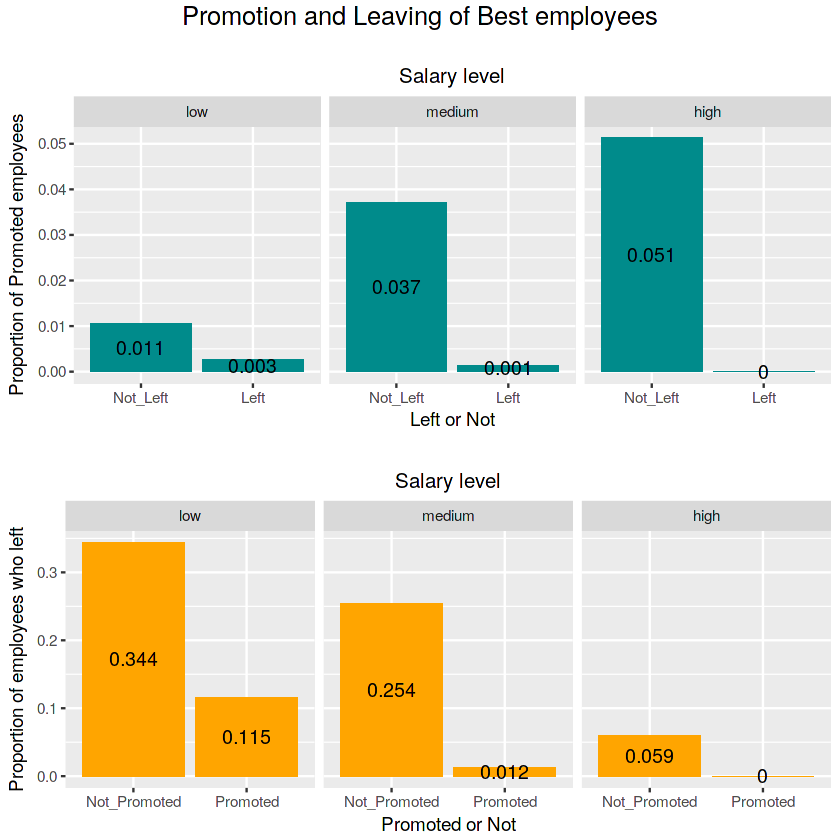

In [29]:
# Calculate the proportion of promoted employess grouped by left and salary
Data_meanPromotion_by_salary_left <- Data_high_eval %>%  
                             group_by(salary, left.Factor) %>%
                             summarise(Proportion_promotion = mean(promotion_last_5years))
# Promoted or not facet wrap by salary
p1 = ggplot(Data_meanPromotion_by_salary_left, aes(x=left.Factor, y =Proportion_promotion,
                                                  label = round(Proportion_promotion,3))) +
  geom_bar(stat="identity", fill = 'darkcyan') + facet_wrap(~salary) +
  geom_text(size = 4, position = position_stack(vjust = 0.5)) +
  xlab('Left or Not') + ylab('Proportion of Promoted employees') + 
  ggtitle(label = "", subtitle = 'Salary level') +
  theme(plot.subtitle = element_text(size =12, hjust = 0.5))

# Calculate the proportion of employees who left grouped by promoted and salary
Data_meanLeft_by_salary_left <- Data_high_eval %>%  
                             group_by(salary, promotion_last_5years.Factor) %>%
                             summarise(Proportion_Left = mean(left))
# Promoted or not facet wrap by salary
p2 = ggplot(Data_meanLeft_by_salary_left, aes(x=promotion_last_5years.Factor, y =Proportion_Left,
                                             label = round(Proportion_Left,3))) +
  geom_bar(stat="identity", fill = 'orange')  + facet_wrap(~salary)  +
  geom_text(size = 4, position = position_stack(vjust = .5)) +
  xlab('Promoted or Not') + ylab('Proportion of employees who left') + 
  ggtitle(label = "", subtitle = 'Salary level') +
  theme(plot.subtitle = element_text(size =12, hjust = 0.5))

grid.arrange(p1,p2, top=textGrob("Promotion and Leaving of Best employees", 
                                 gp=gpar(fontsize=15,font=8))) 

(Top)

- Two features, salary level and promotion, were also investigated to see whether these are other factors that affect leaving rates of best employees.
- In general, the proportion of promoted employees is much higher for the not left group than for the left group and more proportions of employees are promoted if their salary level is higher.
- More interestingly, the proportion difference between the left and not left groups gets more severe as salary level increases. If salary level of an employee is higher, a promotion is a bigger factor that makes the employee stay in the company.

(Bottom)

- In general, the proportion of best employees  who left decreases as salary level increases. i.e., Best employees are more likely to stay if they are paid more.
- Each graph shows promoted employees are less likely to leave the workplace.
- The difference on the proportion of employees who left between promoted and not promoted groups is more severe for the higher salary group. For the low salary group, the leaving rate for the not promoted group is about 3 times higher than that for the promoted group (.344 vs. .115). For the medium salary group, it is around 20 times and for the high salary group, it is infinity times since no one left the company in the promoted group.

**Summary** 

The following are some main findings.

- The best employees who left the company had lower satisfaction level, completed more projects, spent many more monthly hours at workplace and spent more years  in the company.
- If best employees are in the higher salary level or promoted in the last 5 years, they are less likely to leave the company.  Moreover, a promotion is a stronger factor that makes best employees stay in the company for the higher salary group.

*For the machine learning part by Python, check out the other jupyter notebook in the same repository.